## Visualizing FordGoBike Data (2019)
### by Islam Muhammad

## Investigation Overview

> In this investigation, I want to look at the common customer behavior and characteristics of the Bay Area FordGoBike system. The main focus of my investigation is the strength of the relationship between user type, age, and flight time

## Dataset Overview

> The data structure now consists of 173467 rows and 17 columns, which is summarized in the data of the flight time in terms of the start and end time and the duration of the trip. There are also data for the start and end stations and user data such as the type of the user, his age and the gender of the user.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv("Downloads/data/Visualization/fordgobike-clean.csv" , sep=',', encoding='utf8')

<b>Now, let's look at the user type split for FordGoBike sharing system</b>

In [3]:
# Let's calculate the customer and subscriber split
count_user = df_clean.groupby('user_type')['bike_id'].count()
print(count_user,'\n','='*40)
print('proportion Customer : ', count_user[0]/count_user.sum()*100)
print('proportion Subscriber : ', count_user[1]/count_user.sum()*100)

user_type
Customer       16547
Subscriber    156920
Name: bike_id, dtype: int64 
proportion Customer :  9.538990124922895
proportion Subscriber :  90.46100987507711


## Individual trips by subscription type

> Ford GoBike System currently offers 3 subscribtion types: Single Ride, Access Pass (24h or 72h) and Monthly Membership. Userss with a monthly membership ("Subscriber") make up almost 90.5% of all users in 2019 that used the system. 9.5% were casual riders ("Customer") using the bike share system ocasionally.

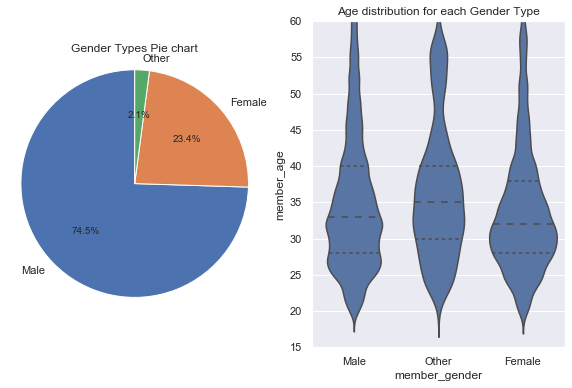

In [4]:
plt.figure(figsize = [10, 6])
color = sns.color_palette()[0]
plt.subplot(1,2,1)
count_gender = df_clean['member_gender'].value_counts()
plt.pie(count_gender, labels = count_gender.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square')
plt.title('Gender Types Pie chart')

plt.subplot(1,2,2)
sns.violinplot(data = df_clean, x = 'member_gender', y = 'member_age', color = color, inner='quartile');
plt.ylim((15,60))
plt.title("Age distribution for each Gender Type");

## (Ford GoBike System )
**The following Visualization consists of two graphs, the first pie chart represent the gender types of our dataset with percentage of each gender type. The second box plot shows the age quartile distribution of each gender type.**

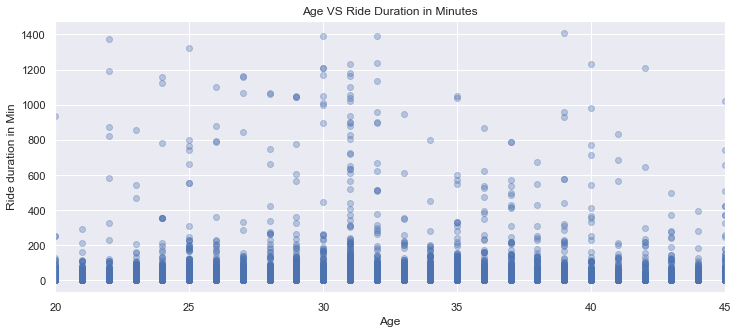

In [5]:
# relation between age and ride duration
plt.figure(figsize = [12,5])
plt.scatter(data= df_clean , x = 'member_age', y = 'duration_min', alpha = 1/3)
plt.xlim((20,45));
plt.xlabel('Age')
plt.ylabel ('Ride duration in Min')
plt.title('Age VS Ride Duration in Minutes');

##### Ford Go Bike System - Duration (Min) by member age
> **We notice from the graph that the longest tours are usually conducted by people between the ages of 25 and 35. This distribution can coincide with the age distribution for the customers, as we mentioned before, and this can be interpreted as the customers usually take longer than the subscribers in the trips, and this indicates that the customers can be some tourists from outside the country enjoying spending longer time in spending trips**

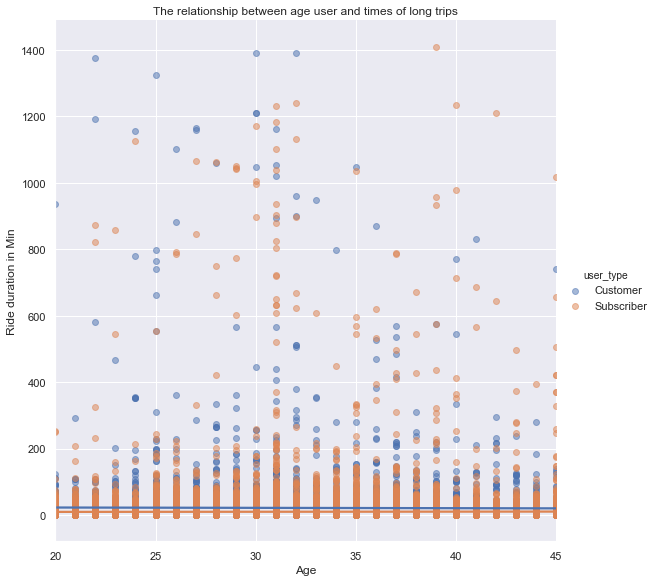

In [6]:
g = sns.FacetGrid(data = df_clean, hue = 'user_type', size=8)
g.map(sns.regplot, 'member_age', 'duration_min', scatter_kws={'alpha' :0.5})
g.add_legend();
plt.xlim((20,45));
plt.xlabel('Age')
plt.ylabel ('Ride duration in Min')
plt.title('The relationship between age user and times of long trips');

## Summary
> While exploring, I found that there are two types of customers who use the system: subscribers who use it for their daily commute, those who have short trips to and from work, those who rent a bike on weekdays from 8 to 9 am and 5 to 6 pm, and customers, usually Tourists. Or regular riders who mainly use the system on weekends and we also found that longer rides are usually conducted by people between the ages of 25 and 35. This distribution can coincide with the age distribution of the customers, and this can be explained because the customers usually take longer than the subscribers of the trips, and this indicates that the customers could be some tourists from outside the country and enjoy spending more time on the trips.

In [8]:
!jupyter nbconvert explanatory.ipynb --to slides --no-input


[NbConvertApp] Converting notebook explanatory.ipynb to slides
[NbConvertApp] Writing 451735 bytes to explanatory.slides.html
